## 17 - Resampling Wind Barbs

[Youtube](https://www.youtube.com/watch?v=b0RsN9mCY5k)

In [1]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units

In [2]:
date = datetime(2017, 9, 10, 0)
station = 'BMX'
df = WyomingUpperAir.request_data(date, station)

In [3]:
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u = df['u_wind'].values * units(df.units['u_wind'])
v = df['v_wind'].values * units(df.units['v_wind'])

In [4]:
import matplotlib.pyplot as plt
import metpy.plots as plots
%matplotlib inline

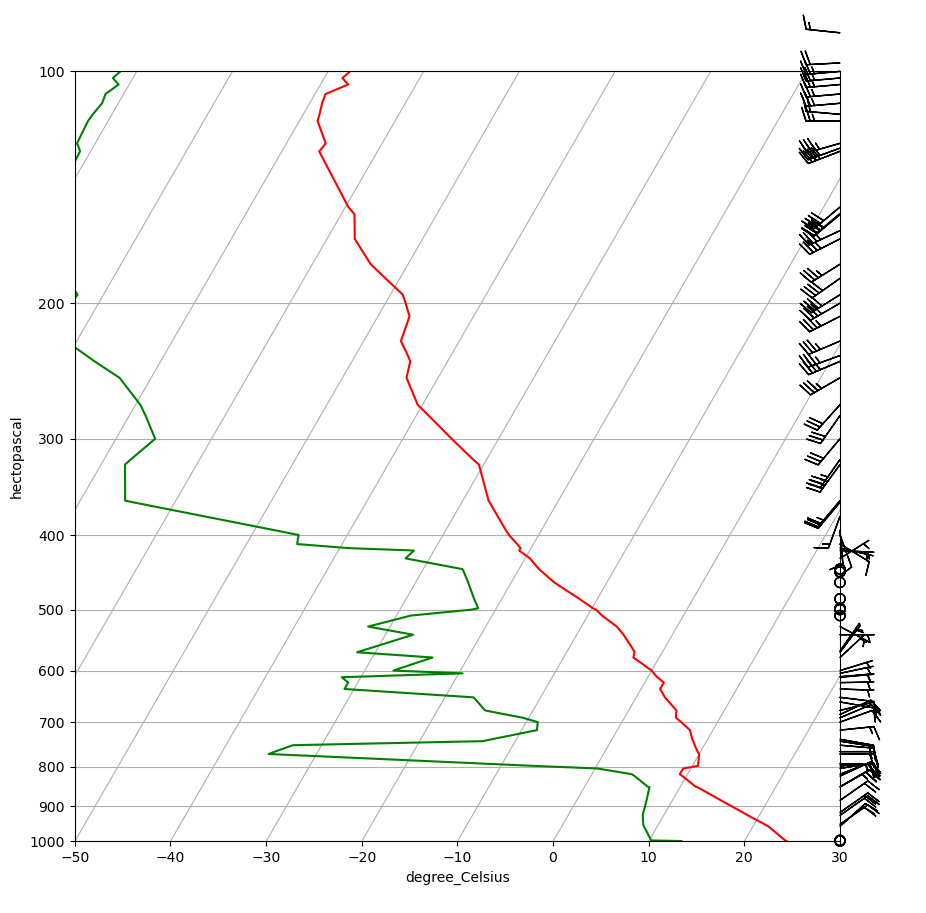

In [5]:
fig = plt.figure(figsize = (10, 10))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 30)
skew.plot_barbs(p, u, v)

In [6]:
mask = p >= 100 *units.hPa
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

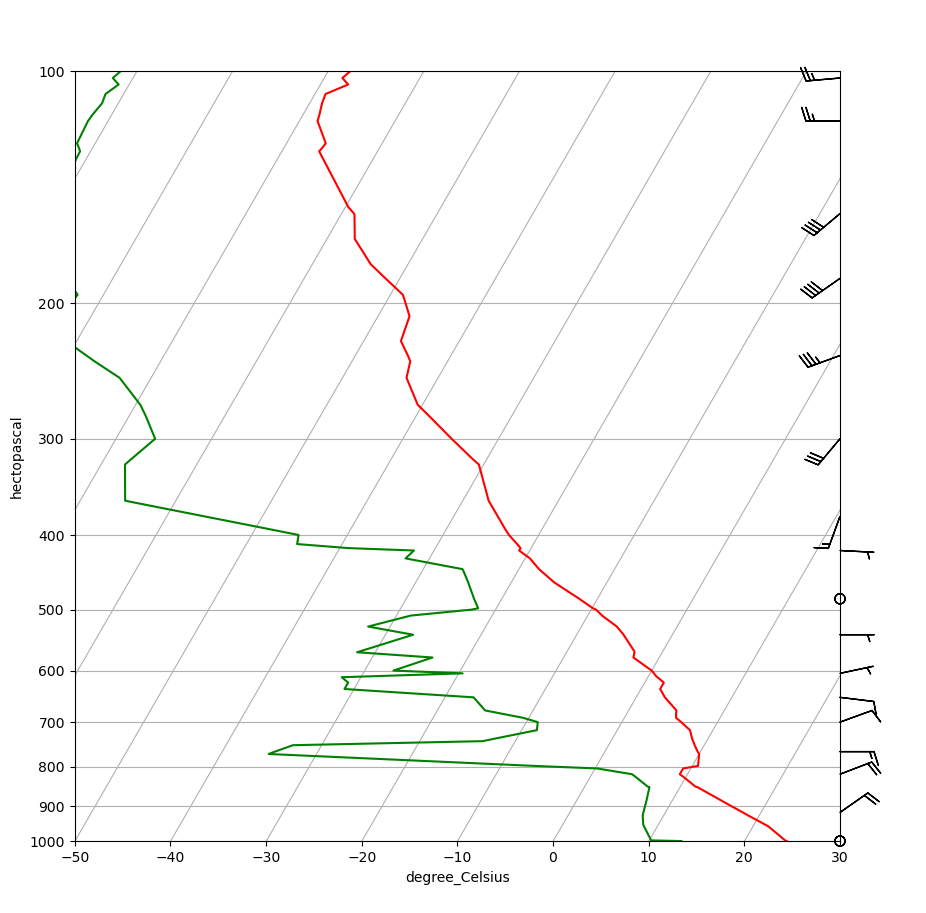

In [7]:
fig = plt.figure(figsize = (10, 10))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 30)
skew.plot_barbs(p[mask][::5], u[mask][::5], v[mask][::5])

In [8]:
import numpy as np
import metpy.calc as mpcalc

In [9]:
interval = np.arange(100, 1000, 50) * units.hPa
interval

Magnitude,[100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950]
Units,hectopascal


In [10]:
idx = mpcalc.resample_nn_1d(p, interval)
idx

[81, 71, 63, 58, 55, 52, 48, 42, 38, 35, 31, 25, 20, 16, 12, 7, 6, 3]

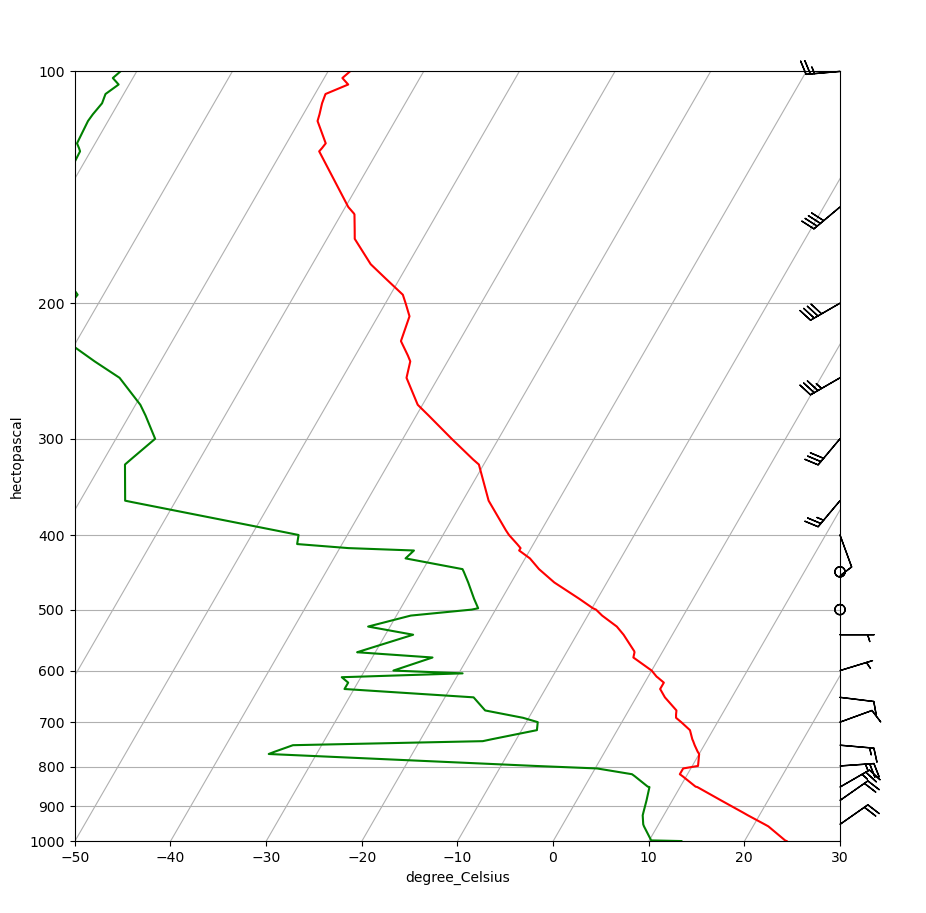

In [11]:
fig = plt.figure(figsize = (10, 10))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 30)
skew.plot_barbs(p[idx], u[idx], v[idx])

In [12]:
np.logspace(2,3)

array([ 100.        ,  104.81131342,  109.8541142 ,  115.13953993,
        120.67926406,  126.48552169,  132.57113656,  138.94954944,
        145.63484775,  152.64179672,  159.98587196,  167.68329368,
        175.75106249,  184.20699693,  193.06977289,  202.35896477,
        212.09508879,  222.29964825,  232.99518105,  244.20530945,
        255.95479227,  268.26957953,  281.1768698 ,  294.70517026,
        308.88435965,  323.74575428,  339.32217719,  355.64803062,
        372.75937203,  390.69399371,  409.49150624,  429.19342601,
        449.8432669 ,  471.48663635,  494.17133613,  517.94746792,
        542.86754393,  568.9866029 ,  596.36233166,  625.05519253,
        655.12855686,  686.648845  ,  719.685673  ,  754.31200634,
        790.60432109,  828.64277285,  868.51137375,  910.29817799,
        954.09547635, 1000.        ])

In [13]:
interval = np.logspace(2, 3) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)

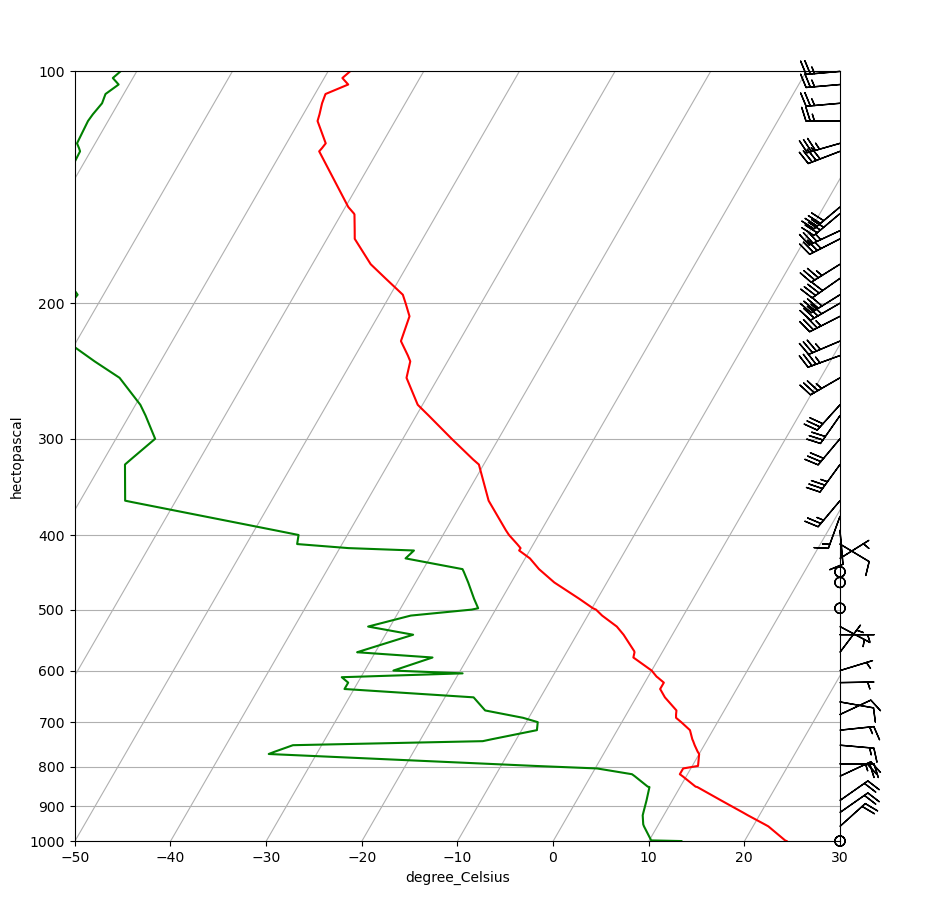

In [14]:
fig = plt.figure(figsize = (10, 10))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 30)
skew.plot_barbs(p[idx], u[idx], v[idx])